# This Section for the Estimation

# Reading csv file and converting its date column to yyyy/mm/dd format



**Please Make sure to upload Covid-19-India.csv file in your Local drive before run this program.**

In [0]:
from google.colab import files
uploaded = files.upload();

import pandas as pd
import datetime
#import numpy.plot


covid_data=pd.read_csv('covid_19_india.csv')

#covid_data['Date'] = pd.to_datetime(covid_data['Date'],format='%d/%m/%Y')


#covid_data['Date']= pd.to_datetime(covid_data['Date']) 
covid_data['Date'] = pd.to_datetime(covid_data.Date,dayfirst=True) #Convert to DD/MM/YYYY to YYYY/MM/DD
covid_data['Date'] = covid_data['Date'].dt.strftime('%Y/%m/%d')
data_by_dates = covid_data.groupby("Date")[["Deaths","Confirmed","Cured"]].sum()

#data_by_dates.tail(5)
#data_by_dates.tail()
#data_by_dates.head()
data_by_dates.describe()
##data_by_dates.plot(kind="line",figsize=(20,6))

Saving covid_19_india1.csv to covid_19_india1 (1).csv


,Deaths,Confirmed,Cured
count,72.000000,72.000000,72.000000
mean,17.708333,692.277778,53.277778
std,41.674945,1494.849611,114.645224
min,0.000000,1.000000,0.000000
25%,0.000000,3.000000,0.000000
50%,0.000000,30.500000,3.000000
75%,7.500000,454.500000,28.000000
max,206.000000,6761.000000,516.000000


# Insert Library for forecasting FBPROPHET.

In [0]:
import fbprophet as fbpt 
from fbprophet import Prophet as pt
#dir(fbpt)


# Adding seasonality to model

In [0]:
modelp1 = pt()
modelp1.add_seasonality(name="monthly",period=30,fourier_order=5)

# Printing 5 records from tail

In [0]:
# Split data in Serial
#data_by_dates.head()
#print(data_by_dates)
#data_by_dates.head()
serial_data = data_by_dates.reset_index()
#serial_data.head()
serial_data.tail()

,Date,Deaths,Confirmed,Cured
67,2020/04/06,111,4281,319
68,2020/04/07,124,4789,353
69,2020/04/08,149,5274,411
70,2020/04/09,169,5865,478
71,2020/04/10,206,6761,516


# Renaming column name to ds and y to plot its graphs of prediction

In [0]:
# To fit into model attribute must have name "ds" and "y".
# For rename on DataSet.
testDeath = serial_data[["Date","Deaths"]]
testConfirmed = serial_data[["Date","Confirmed"]]

testDeath.rename(columns={"Date":"ds","Deaths":"y"},inplace=True)
testConfirmed.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)
testDeath.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(72, 2)

In [0]:
test_Death = testDeath[:40]
fact_Death = testDeath[45:]
#test_Death.tail()
fact_Death.tail()

,ds,y
67,2020/04/06,111
68,2020/04/07,124
69,2020/04/08,149
70,2020/04/09,169
71,2020/04/10,206


# Fitting model

In [0]:
#Fit test_Death into Model
modelp1.fit(test_Death)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Generating future dates

In [59]:
future_dates = modelp1.make_future_dataframe(periods=80)
#future_dates.head()
future_dates.tail()

,ds
115,2020-05-24
116,2020-05-25
117,2020-05-26
118,2020-05-27
119,2020-05-28


# Predicting and plotting using generated future dates

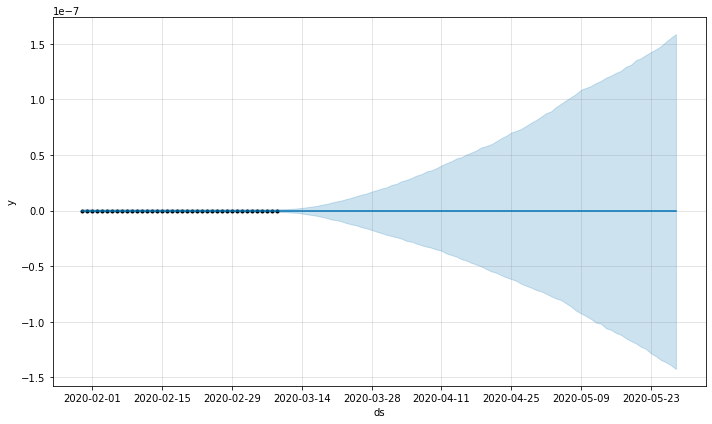

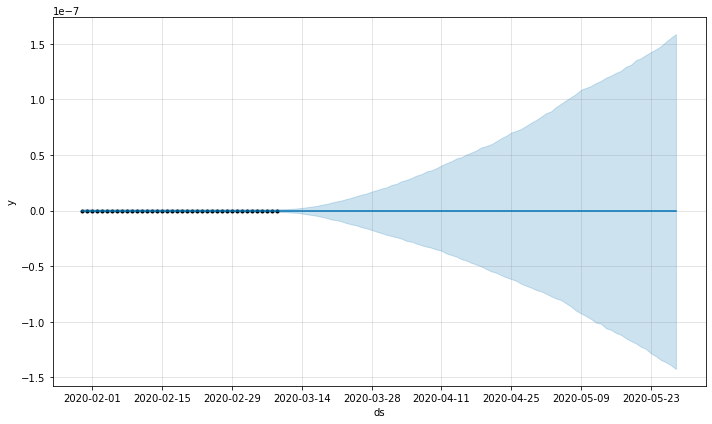

In [0]:
# Predicition Time!!
prediction = modelp1.predict(future_dates)
# print(prediction)
modelp1.plot(prediction)

# Actual graph of death due to covid-19 till now

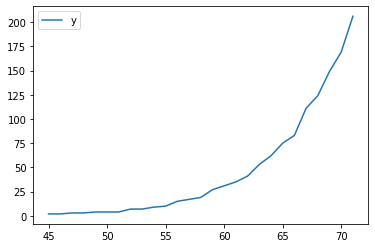

In [0]:
import matplotlib.pyplot as plt
fact_Death.plot();